### Adv. Hydrology Project:
---

#### 2. What are the impacts of different combinations of parameterization methods on modeling the temporal snow patterns?

SUMMA model sensitivity analysis comparing model parameterizations for:

##### Snow thermal conductivity
*   Parameterizations: ('tyen1965', 'melr1977', 'jrdn1991', 'smnv2000')
*   Parameters: fixedThermalCond_snow

##### Snow albedo decay
*   Parameterizations: ('conDecay', 'varDecay')
*   Parameters: albedoDecayRate


Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path
import xarray as xr
import pandas as pd
from datetime import datetime

In [7]:
summa_executable = 'summa.exe'
# file manager for CUES model runs
case_path = '/home/jovyan/cues'
filemanager_path = os.path.join(case_path, 'summa_setup/cues_file_manager.txt')

### Baseline Model 

In [8]:
# CUES simulation setup
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
# set the simulation start and finish times
S.decisions.simulStart.set_value("2010-10-01 00:00")
S.decisions.simulFinsh.set_value("2017-08-01 22:00")

In [9]:
# run CUES simulation
S.start(run_option='local', run_suffix='cues')
S.monitor()

False

In [10]:
# Look at output
# print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
# print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

***
### SWE Timeline:

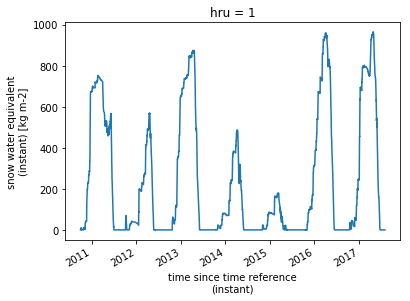

In [16]:
# Plot SWE timelines
S.output.scalarSWE.plot()
# cues.scalarSWE.plot(color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
# ceres.scalarSWE.plot(color='k',linestyle='-',alpha=0.5,label='Forced with CERES')
# plt.legend(loc='upper left');

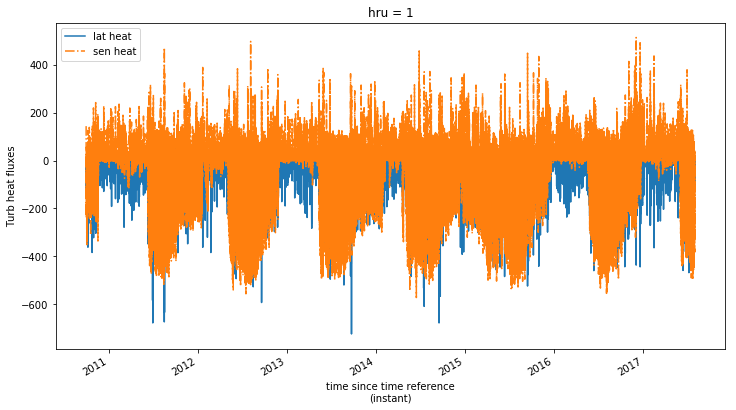

In [17]:
plt.figure(figsize=(12,6))
S.output.scalarLatHeatTotal.plot(label="lat heat")
S.output.scalarSenHeatTotal.plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

/srv/conda/lib/python3.6/site-packages/xarray/core/groupby.py:639: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


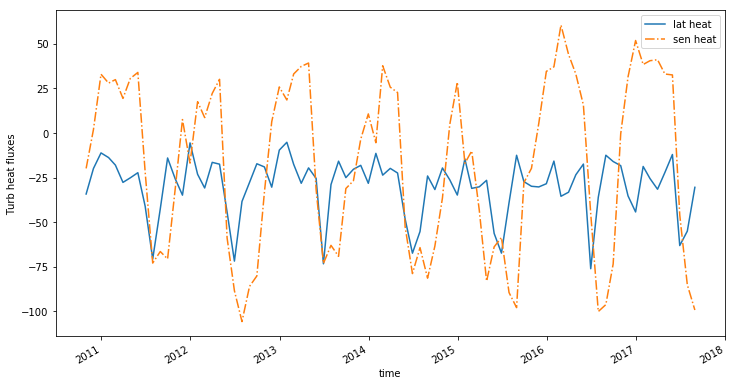

In [18]:
plt.figure(figsize=(12,6))
# plot monthly values
S.output.scalarLatHeatTotal.resample(time='1M').mean().plot(label="lat heat")
S.output.scalarSenHeatTotal.resample(time='1M').mean().plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

***
### Available options to change:

In [23]:
print(S.decisions)

simulStart    '2010-10-01 00:00'   ! simulation start time
simulFinsh    '2017-08-01 22:00'   ! simulation end time
soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    MODIFIED_IGBP_MODIS_NOAH ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    monTable             ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    qTopmodl             ! choice of groundwater parameterization
hc_profile    pow_prof             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux            

In [26]:
S.decisions.thCondSnow.available_options

['tyen1965', 'melr1977', 'jrdn1991', 'smnv2000']

In [25]:
S.decisions.alb_method.available_options

['conDecay', 'varDecay']

Here we will do 8 different simulations - the four thermal conductivity options for each of the two albedo decay methods


***
### SUMMA - combinations of parameterizations

In [27]:
S_con_tyen = copy.copy(S)
S_con_tyen.decisions.thCondSnow.set_value('tyen1965')
S_con_tyen.decisions.alb_method.set_value('conDecay')
S_con_tyen.start(run_option = 'local', run_suffix="con_tyen")
S_con_tyen.monitor()

False

In [28]:
S_con_melr = copy.copy(S)
S_con_melr.decisions.thCondSnow.set_value('melr1977')
S_con_melr.decisions.alb_method.set_value('conDecay')
S_con_melr.start(run_option = 'local', run_suffix="con_melr")
S_con_melr.monitor()

False

In [29]:
S_con_jrdn = copy.copy(S)
S_con_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_con_jrdn.decisions.alb_method.set_value('conDecay')
S_con_jrdn.start(run_option = 'local', run_suffix="con_jrdn")
S_con_jrdn.monitor()

False

In [30]:
S_con_smnv = copy.copy(S)
S_con_smnv.decisions.thCondSnow.set_value('smnv2000')
S_con_smnv.decisions.alb_method.set_value('conDecay')
S_con_smnv.start(run_option = 'local', run_suffix="con_smnv")
S_con_smnv.monitor()

False

In [31]:
S_var_tyen = copy.copy(S)
S_var_tyen.decisions.thCondSnow.set_value('tyen1965')
S_var_tyen.decisions.alb_method.set_value('varDecay')
S_var_tyen.start(run_option = 'local', run_suffix="var_tyen")
S_var_tyen.monitor()

False

In [32]:
S_var_melr = copy.copy(S)
S_var_melr.decisions.thCondSnow.set_value('melr1977')
S_var_melr.decisions.alb_method.set_value('varDecay')
S_var_melr.start(run_option = 'local', run_suffix="var_melr")
S_var_melr.monitor()

False

In [33]:
S_var_jrdn = copy.copy(S)
S_var_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_var_jrdn.decisions.alb_method.set_value('varDecay')
S_var_jrdn.start(run_option = 'local', run_suffix="var_jrdn")
S_var_jrdn.monitor()

False

In [34]:
S_var_smnv = copy.copy(S)
S_var_smnv.decisions.thCondSnow.set_value('smnv2000')
S_var_smnv.decisions.alb_method.set_value('varDecay')
S_var_smnv.start(run_option = 'local', run_suffix="var_smnv")
S_var_smnv.monitor()

False

***

## Comparison Plots

### 1. Scalar SWE 

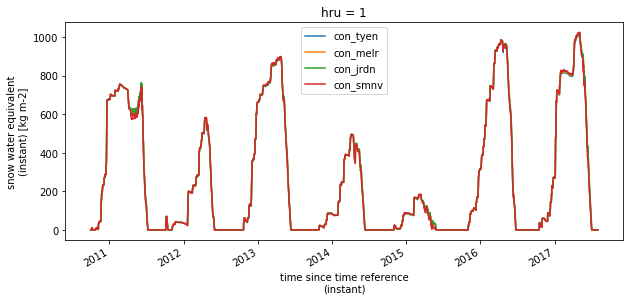

In [47]:
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSWE.plot(label='con_tyen')
S_con_melr.output.scalarSWE.plot(label='con_melr')
S_con_jrdn.output.scalarSWE.plot(label='con_jrdn')
S_con_smnv.output.scalarSWE.plot(label='con_smnv')
plt.legend()

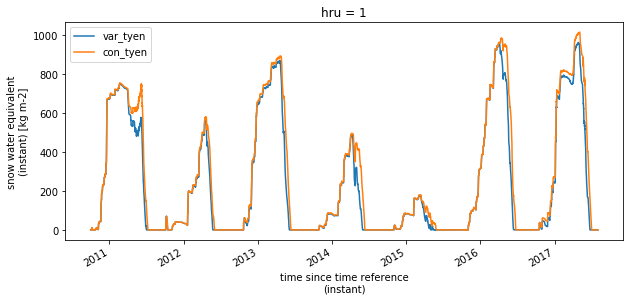

In [49]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSWE.plot(label='var_tyen')
S_con_tyen.output.scalarSWE.plot(label='con_tyen')
plt.legend()

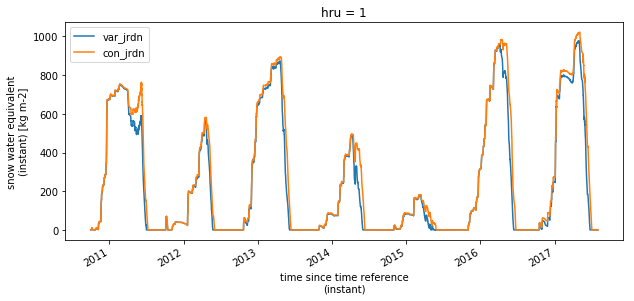

In [50]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSWE.plot(label='var_jrdn')
S_con_jrdn.output.scalarSWE.plot(label='con_jrdn')
plt.legend()

***
### 2a. Snow Surface Temperature 

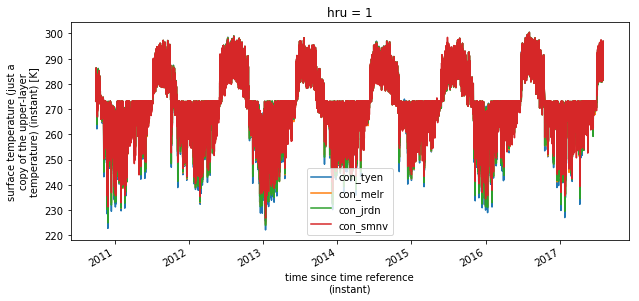

In [52]:
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.plot(label='con_smnv')
plt.legend()

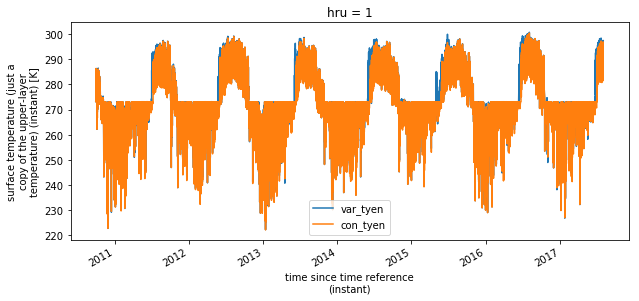

In [53]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
plt.legend()

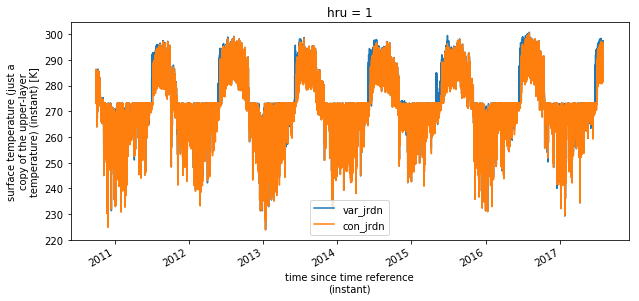

In [62]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
plt.legend()

### 2b. Monthly Snow Surface Temperature

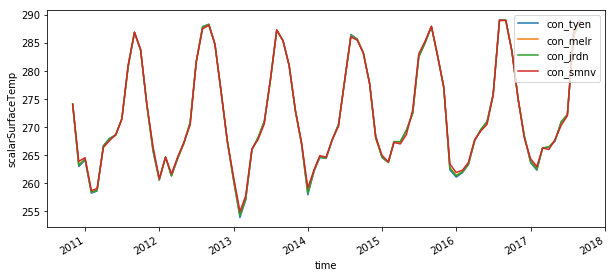

In [61]:
# Compare all thermal cond options for con albedo
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_smnv')
plt.legend()

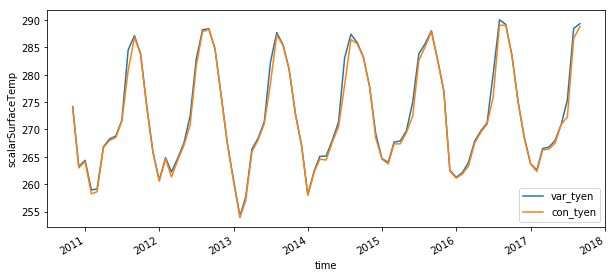

In [57]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
plt.legend()

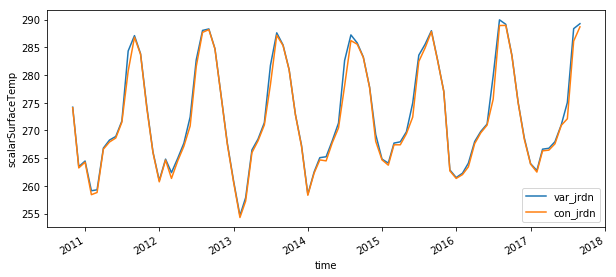

In [64]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
plt.legend()